<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10章 アンサンブル学習

アンサンブル学習で、breast\_cancerデータの識別を行います。breast\_cancerデータは腫瘍の画像から取り出した半径や周囲の値の平均・標準偏差・最大値などを特徴とし、その腫瘍が悪性(malignant)か良性(benign)かという正解が付いたデータです。

ライブラリの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import tree

breast_cancerデータを読み込んでX, yに格納後、概要を表示します。

In [2]:
bc = load_breast_cancer(as_frame=True)
X = bc.data
y = bc.target
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

可視化によって問題の難しさの検討をつけます。一部に重なりはありますが、比較的識別しやすいデータのように見えます。

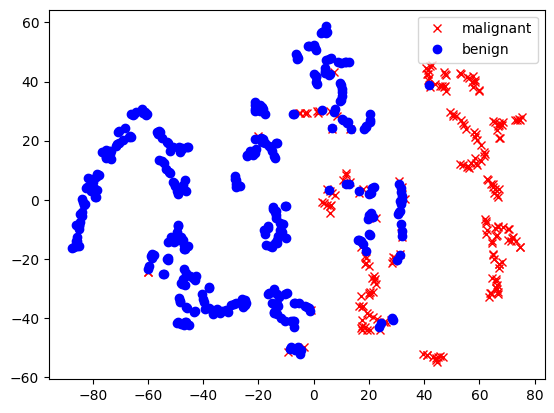

In [5]:
tsne = TSNE(n_components=2, perplexity=5, random_state=1)
X2 = tsne.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1], 'rx', label=bc.target_names[0])
plt.plot(X2[y==1,0], X2[y==1,1], 'bo', label=bc.target_names[1])
plt.legend()
plt.show()

## バギング

base_estimator引数で識別器を指定します。指定しない場合は決定木になります。

In [6]:
clf1 = ensemble.BaggingClassifier()

交差確認法で評価します。

In [7]:
scores = cross_val_score(clf1, X, y, cv=10)
print(f'{scores.mean() * 100:4.2f} +/- {scores.std() * 200:4.2f} %')

95.44 +/- 5.91 %


弱識別器として作成された決定木の根に近い部分を表示します。比較的似ている決定木になっていることがわかります。

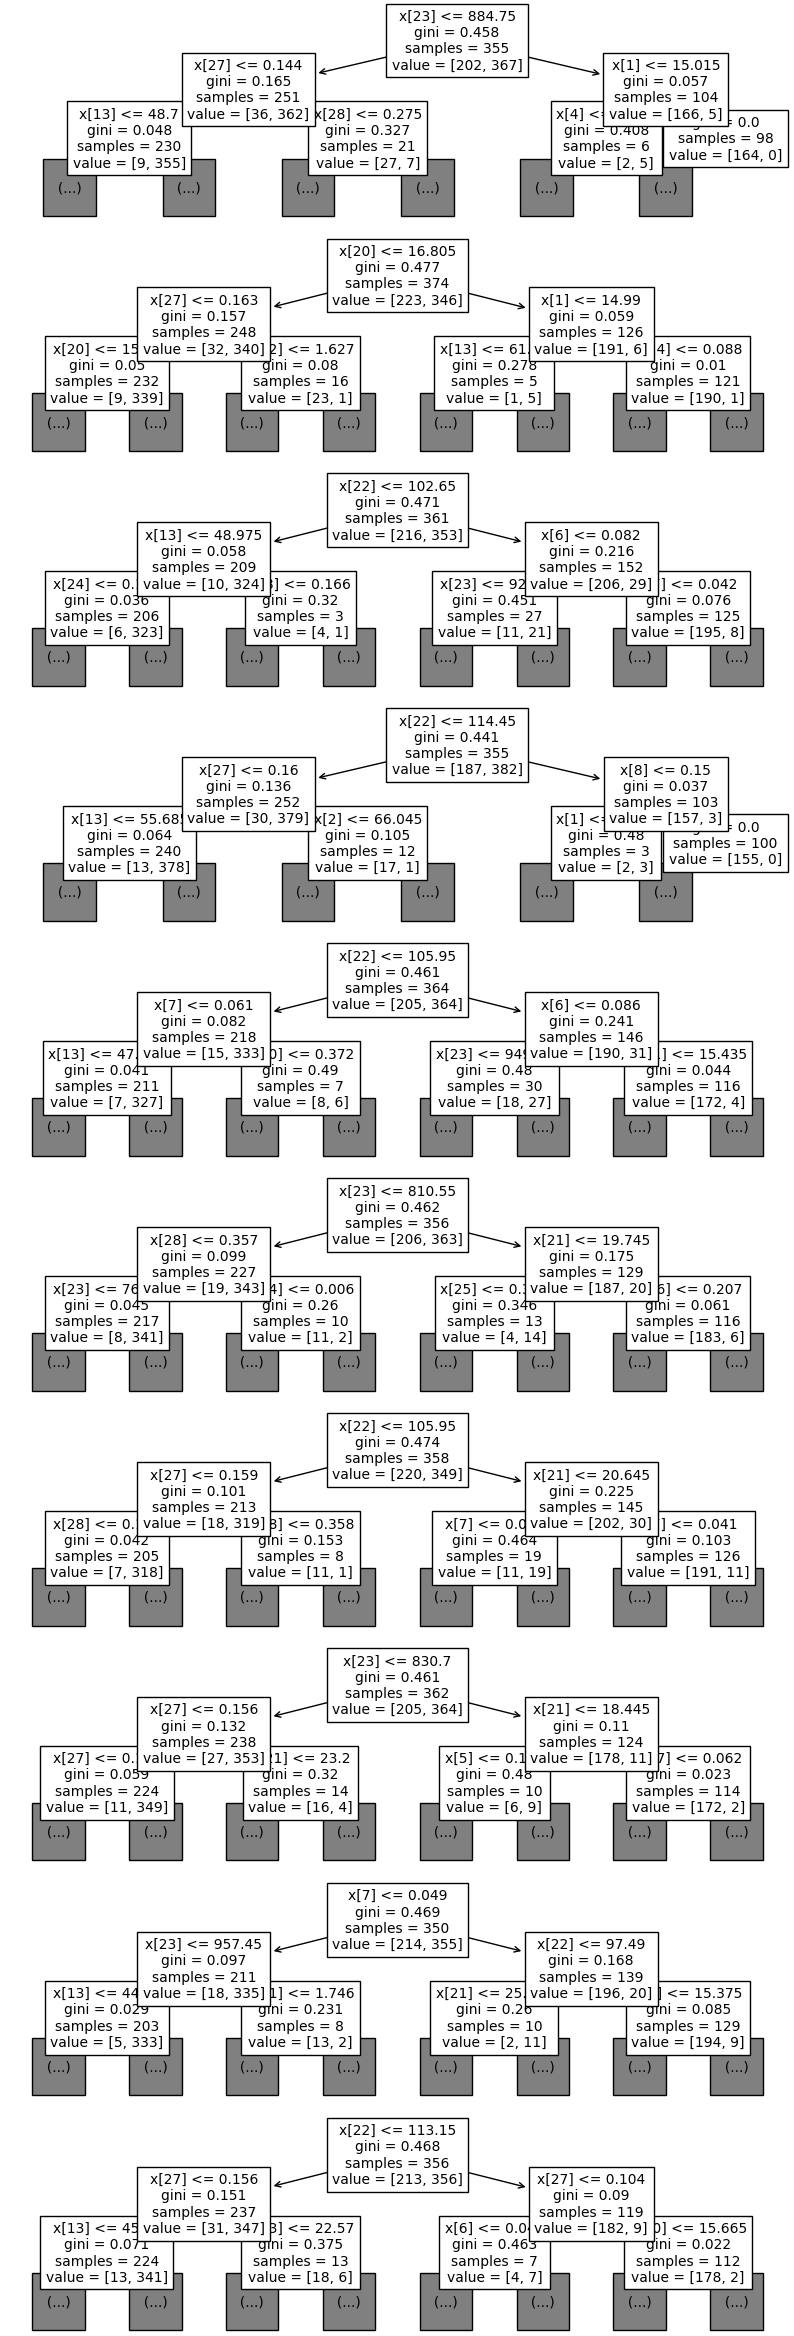

In [8]:
clf1.fit(X, y)

fig, ax = plt.subplots(len(clf1.estimators_),1, figsize=(10,30))

for i, t in enumerate(clf1.estimators_):
  tree.plot_tree(t, ax=ax[i], fontsize=10, max_depth=2)

## ランダムフォレスト

In [9]:
clf2 = ensemble.RandomForestClassifier(n_estimators=10)

交差確認法で評価します。

In [10]:
scores = cross_val_score(clf2, X, y, cv=10)
print(f'{scores.mean() * 100:4.2f} +/- {scores.std() * 200:4.2f} %')

95.44 +/- 6.69 %


弱識別器として作成された決定木の根に近い部分を表示します。バギングと比べるとある程度異なった決定木になっていることがわかります。

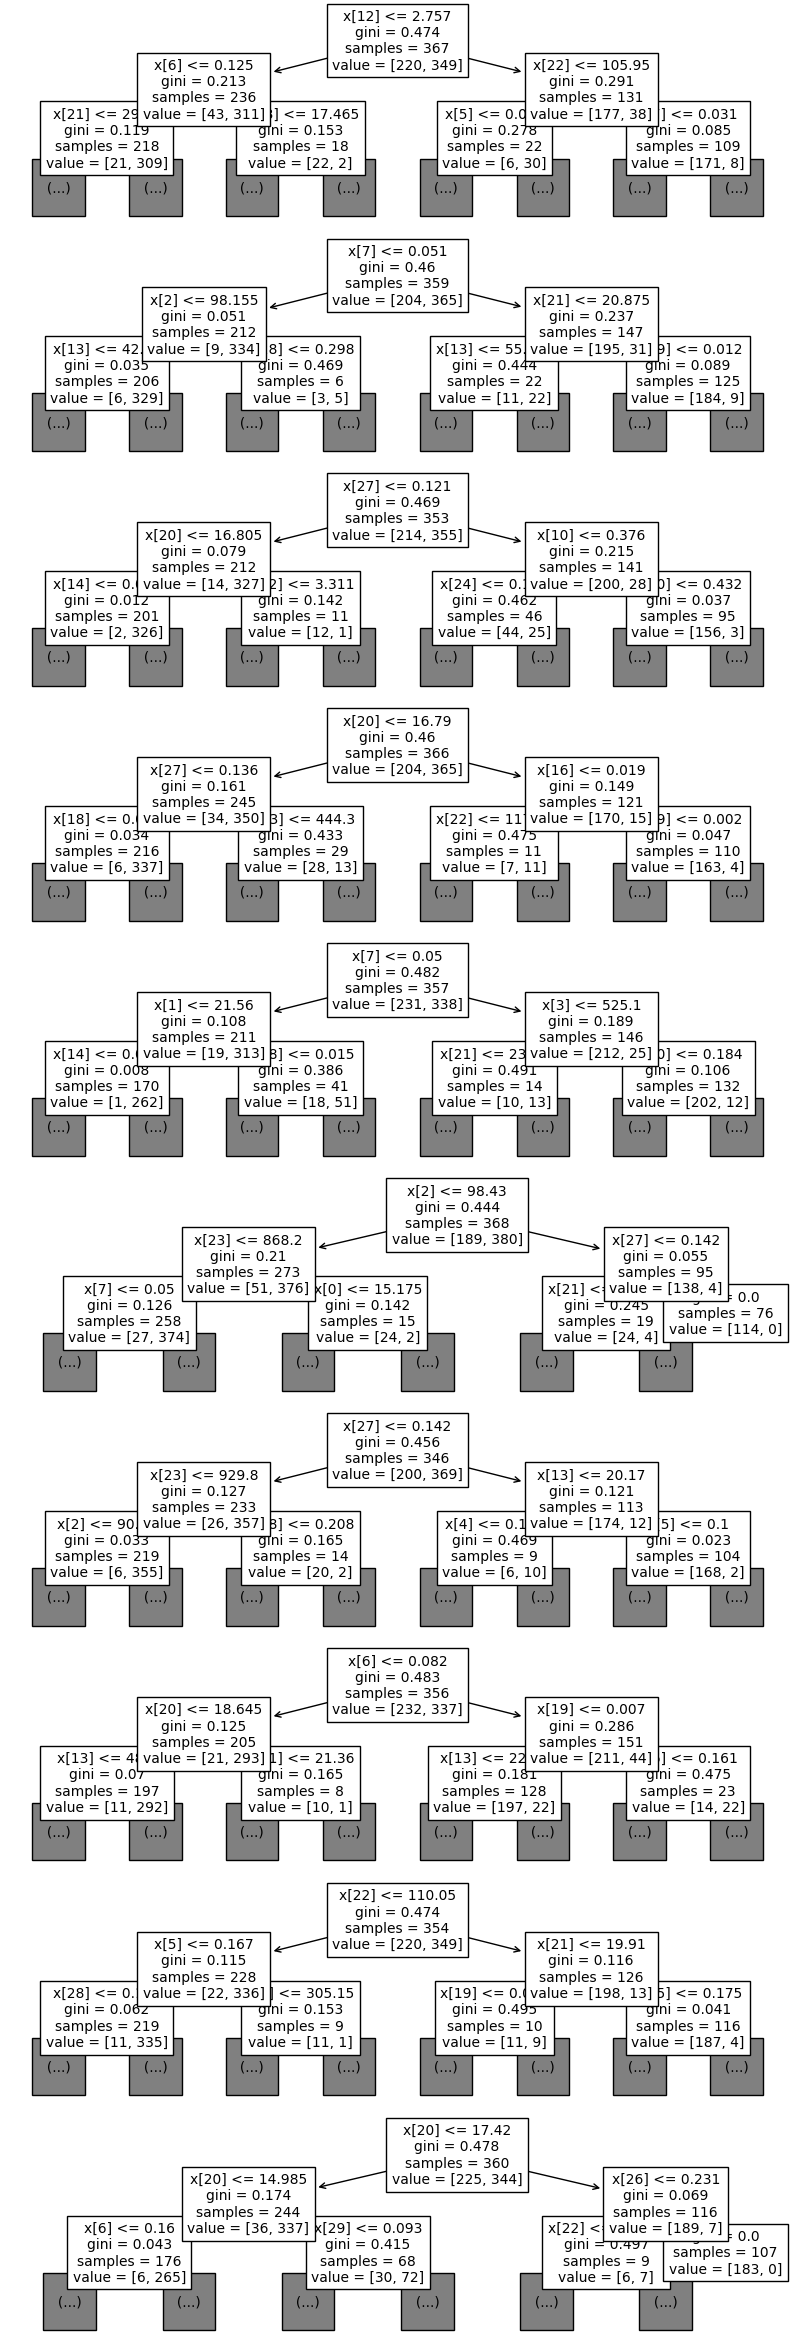

In [11]:
clf2.fit(X, y)

fig, ax = plt.subplots(len(clf2.estimators_),1, figsize=(10,30))

for i, t in enumerate(clf2.estimators_):
  tree.plot_tree(t, ax=ax[i], fontsize=10, max_depth=2)

## Adaブースト

In [12]:
clf3 = ensemble.AdaBoostClassifier()

交差確認法で評価します。

In [13]:
scores = cross_val_score(clf3, X, y, cv=10)
print(f'{scores.mean() * 100:4.2f} +/- {scores.std() * 200:4.2f} %')

96.31 +/- 5.54 %


Adaブーストの弱識別器のデフォルトは深さ1の決定木です。先頭の10個を確認すると、ほとんど異なる特徴が選ばれています。

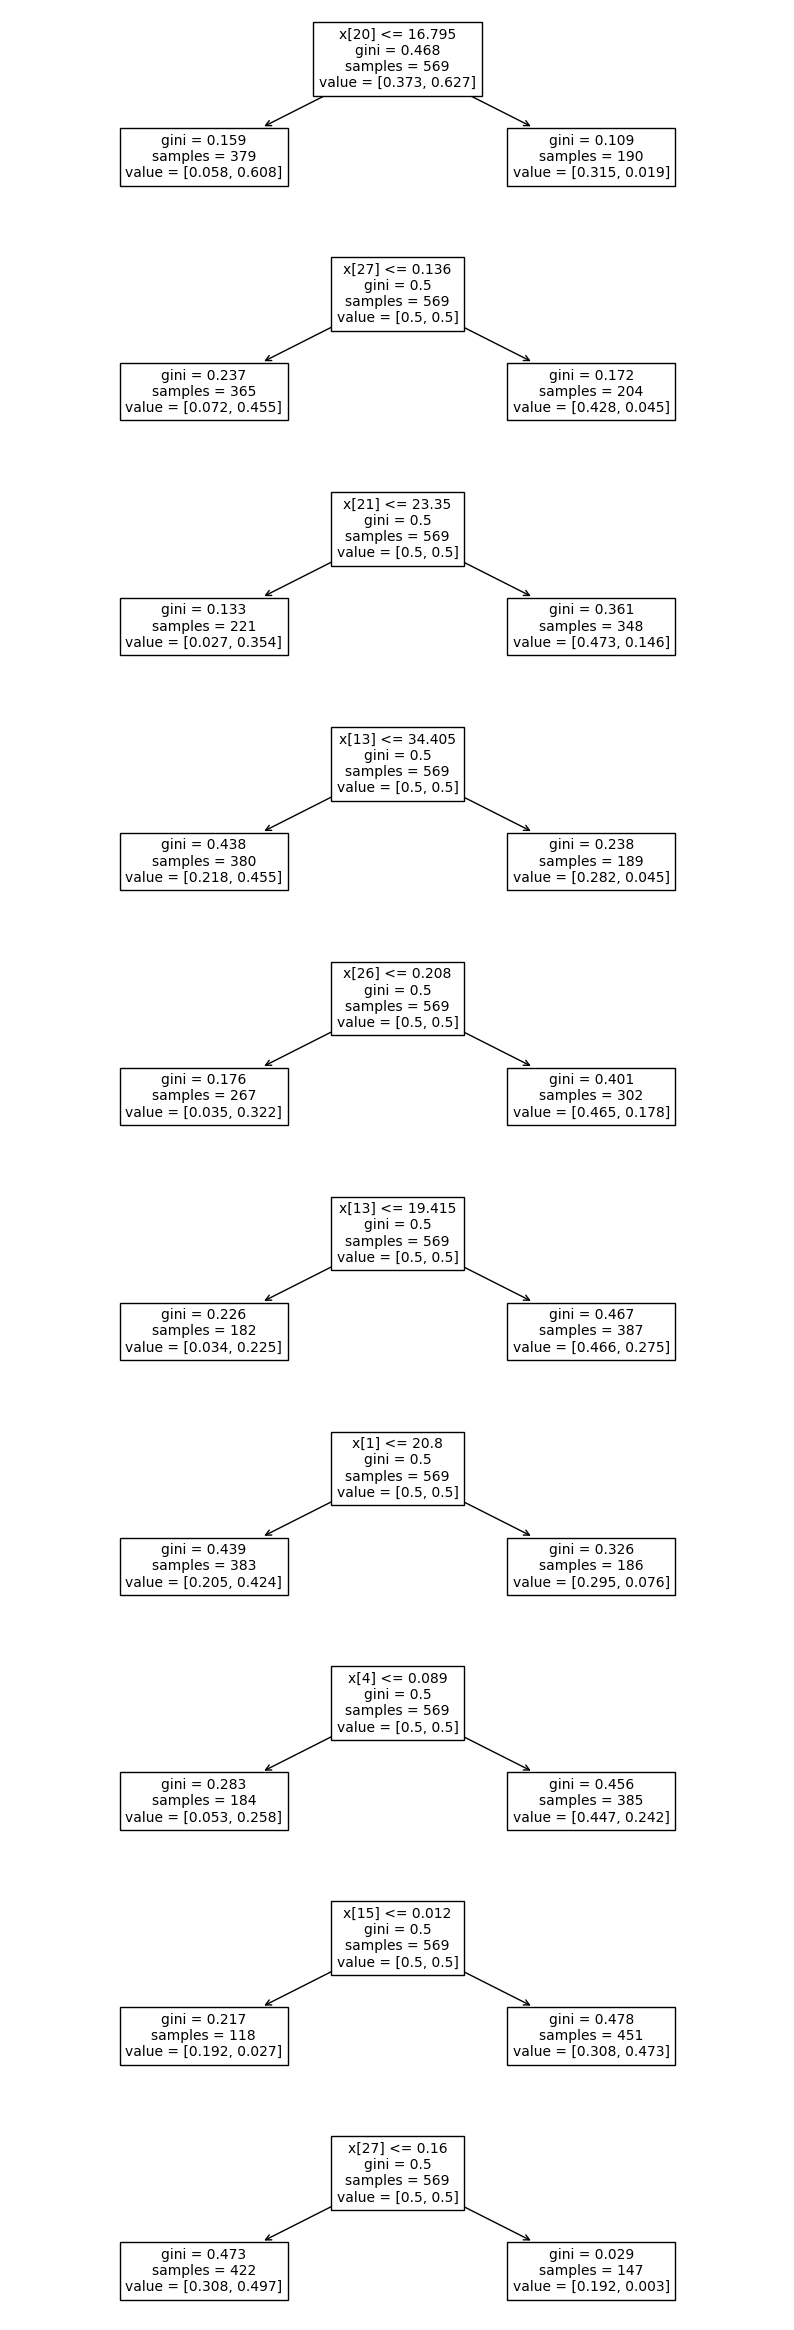

In [14]:
clf3.fit(X, y)

fig, ax = plt.subplots(10 ,1, figsize=(10,30))

for i, t in zip(range(10), clf3.estimators_[:10]):
  tree.plot_tree(t, ax=ax[i], fontsize=10)

## 勾配ブースティング

In [15]:
clf4 = ensemble.GradientBoostingClassifier()

交差確認法で評価します。

In [16]:
scores = cross_val_score(clf4, X, y, cv=10)
print(f'{scores.mean() * 100:4.2f} +/- {scores.std() * 200:4.2f} %')

96.32 +/- 5.07 %


各特徴の重要性を確認することができます。ここでは上位10個まで表示します。

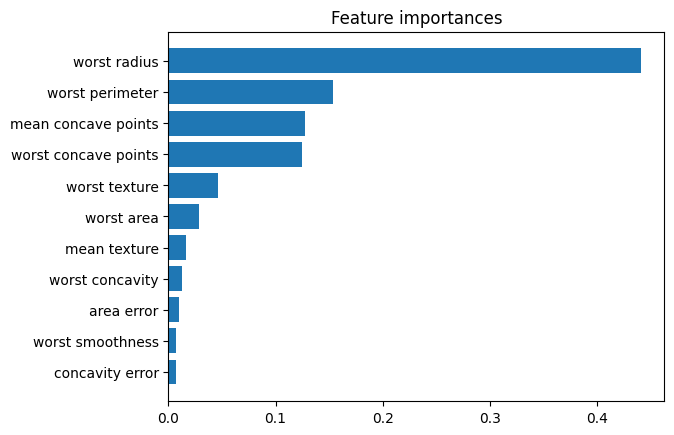

In [17]:
clf4.fit(X,y)
importances = clf4.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(bc.feature_names[indices[10::-1]], importances[indices[10::-1]])
plt.show()

## カテゴリ特徴を含む場合

次にカテゴリ特徴を含んだcredit-gデータの識別を行います。credit-gデータの解説は、教科書p.263を参照してください。

識別器は、カテゴリ特徴をそのまま入力できる
[HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)を使います。これは、二分木で分岐する値を決めるときにヒストグラムを使うことで数値もカテゴリも同様に扱うことができる方法です。

credit-gデータをpandasのDataFrame形式で読み込んでX, yに格納後、概要を表示します。

In [18]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

ds = fetch_openml('credit-g', version = 'active', as_frame=True)
X = ds.data
y = ds.target
print(ds.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Perso

Xの中身を確認します。

In [19]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [20]:
X['housing']

0           own
1           own
2           own
3      for free
4      for free
         ...   
995         own
996         own
997         own
998    for free
999         own
Name: housing, Length: 1000, dtype: category
Categories (3, object): ['for free', 'own', 'rent']

In [21]:
ca = []
for t in X.dtypes:
  if t == 'category':
    ca.append(True)
  else:
    ca.append(False)
ca

[True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True]

In [22]:
ca[14]=False

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

clf5 = make_pipeline(
    ordinal_encoder,
    ensemble.HistGradientBoostingClassifier(categorical_features=ca, max_bins=255)
)

In [24]:
clf5.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79a8189f1240>)])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(categorical_features=[True,
                                                                      False,
                                                                      True,
                                                                      True,
                                                                      False,
                                                                      True,
                                                                      True,
                                                                      False,
                                                                      True,
                                                                      True,
                                                                      False,
                                                                      True,
                                                                      False,
                                                                      True,
                                                                      False,
                                                                      False,
                                                                      True,
                                                                      False,
                                                                      True,
                                                                      True]))])

In [25]:
scores = cross_val_score(clf5, X, y, cv=10)
print(f'{scores.mean() * 100:4.2f} +/- {scores.std() * 200:4.2f} %')

75.50 +/- 8.91 %


## 練習問題

アンサンブル学習で California housing データの回帰を行い、各特徴の重要性を確認してください。

ライブラリの読み込み

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

California housing データを読み込んでX, yに格納後、概要を表示します。

In [27]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

特徴のスケールがかなり異なるので、標準化しておきます。

In [28]:
ss = StandardScaler()
X = ss.fit_transform(X)

## バギング

In [29]:
reg1 = ensemble.BaggingRegressor()
reg1.fit(X, y)

BaggingRegressor()

交差確認法を用いて、決定係数で評価します。

In [30]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(reg1, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.79 (+/- 0.01)


## ランダムフォレスト

In [31]:
reg2 = ensemble.RandomForestRegressor(n_estimators=10)
reg2.fit(X,y)

RandomForestRegressor(n_estimators=10)

In [32]:
scores = cross_val_score(reg2, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.80 (+/- 0.01)


## Adaブースト

In [33]:
reg3 = ensemble.AdaBoostRegressor(n_estimators=100)
reg3.fit(X,y)

AdaBoostRegressor(n_estimators=100)

In [34]:
scores = cross_val_score(reg3, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.41 (+/- 0.05)


## 勾配ブースティング


In [35]:
reg4 = ensemble.GradientBoostingRegressor(n_estimators=200)
reg4.fit(X,y)

GradientBoostingRegressor(n_estimators=200)

In [36]:
scores = cross_val_score(reg4, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.81 (+/- 0.01)


各特徴の重要性を確認するコード

Feature ranking:
1. MedInc (0.5836476507205564)
2. Longitude (0.1258862853183365)
3. AveOccup (0.1255974064040299)
4. Latitude (0.09896039288262441)
5. HouseAge (0.03461747283182526)
6. AveRooms (0.021278992163064087)
7. AveBedrms (0.0052791892453847855)
8. Population (0.004732610434178835)


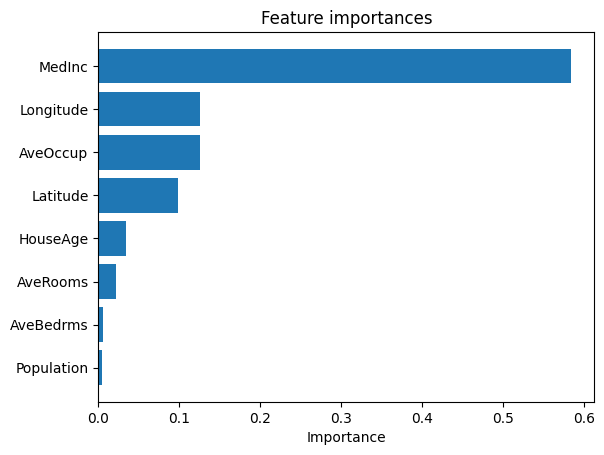

In [37]:
importances = reg4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f'{f+1}. {housing.feature_names[indices[f]]} ({importances[indices[f]]})')

plt.figure()  # 新しい図を初期化
plt.title("Feature importances")  # グラフのタイトル
plt.barh(range(X.shape[1]), importances[indices], align='center')  # 横棒グラフの作成
plt.yticks(range(X.shape[1]), [housing.feature_names[i] for i in indices])  # Y軸にラベルを設定
plt.gca().invert_yaxis()  # y軸の順序を逆にして、上位の特徴が上に来るようにします
plt.xlabel('Importance')  # X軸にラベルを設定
plt.show()  # グラフを表示

## HistGradientBoostingRegressor

データ数が多いとき (10,000件以上)は、高速化のため [HistGradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)が推奨されていますが、特徴の重要性を出力する機能が実装されていません。

In [38]:
reg5 = ensemble.HistGradientBoostingRegressor()
reg5.fit(X,y)

HistGradientBoostingRegressor()

In [39]:
scores = cross_val_score(reg5, X, y, cv=cv, scoring='r2')
print(f"{scores.mean():.2f} (+/- {scores.std():.2f})")

0.84 (+/- 0.02)
